<a href="https://colab.research.google.com/github/PranayLendave/vehicle-counting-using-yolov8/blob/main/vehicle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicle Counting with YOLOv8 and ByteTrack

This notebook presents a comprehensive solution for vehicle counting using the YOLOv8 (You Only Look Once) object detection model in combination with ByteTrack, a tracker designed for object tracking. By leveraging the power of deep learning and tracking algorithms, we can accurately detect and count vehicles in videos.

## Overview

Vehicle counting plays a crucial role in various applications, from traffic management and surveillance to urban planning and safety analysis. This notebook demonstrates how to set up the necessary environment, obtain a dataset, train the YOLOv8 model, and apply ByteTrack for real-time vehicle tracking. The result is a processed video with annotated vehicle counts.

## Key Features

- **YOLOv8 Object Detection:** YOLOv8 is a state-of-the-art deep learning model capable of real-time object detection. In this notebook, we utilize YOLOv8 to detect vehicles in video frames with high accuracy.

- **ByteTrack Object Tracking:** ByteTrack is a sophisticated object tracking algorithm. By combining YOLOv8's detections with ByteTrack's tracking capabilities, we can track vehicles across video frames and count them efficiently.

- **Roboflow Dataset Integration:** We access and download a vehicle dataset from Roboflow, making it easy to integrate and train the YOLOv8 model.

- **Video Processing:** The notebook provides an end-to-end solution for processing a video, counting vehicles, and annotating the results.

- **Visualizations:** The code includes visualizations of training-related statistics and vehicle tracking results, making it easy to evaluate the model's performance.

## How to Use This Notebook

This notebook is structured to guide you through the entire process of vehicle counting. You can follow the step-by-step instructions, and the provided code is well-documented for clarity. If you have your own dataset, you can adapt the code to your specific needs.

Let's get started on the journey of vehicle counting with YOLOv8 and ByteTrack!

**Note:** Before running the code, make sure to set up the necessary environment and ensure that the required packages and dependencies are installed.

*Note: The code and instructions provided in this notebook are for educational purposes and can be customized for specific use cases.*


In [74]:
!nvidia-smi

Sun Nov  5 19:14:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    28W /  70W |   1899MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
# !rm -r /content/vehicle--1

## Setting Up the Dataset

In this section, we will set up the dataset for our project. First, we'll create a directory to store the dataset, and then install the `roboflow` Python package.

I have uploaded the original data on roboflow for easy integration

Next, we'll use the roboflow library to access and download our dataset. We'll need to provide an API key and specify the project and dataset to download.

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="knmHoAoZtB98Ik47n7Hi")
project = rf.workspace("pranay-lendave").project("vehicle-gpaee")
dataset = project.version(2).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to vehicle--2 in yolov8:: 100%|██████████| 1490/1490 [00:00<00:00, 6953.27it/s]


In [47]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/datasets/vehicle--2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

/content


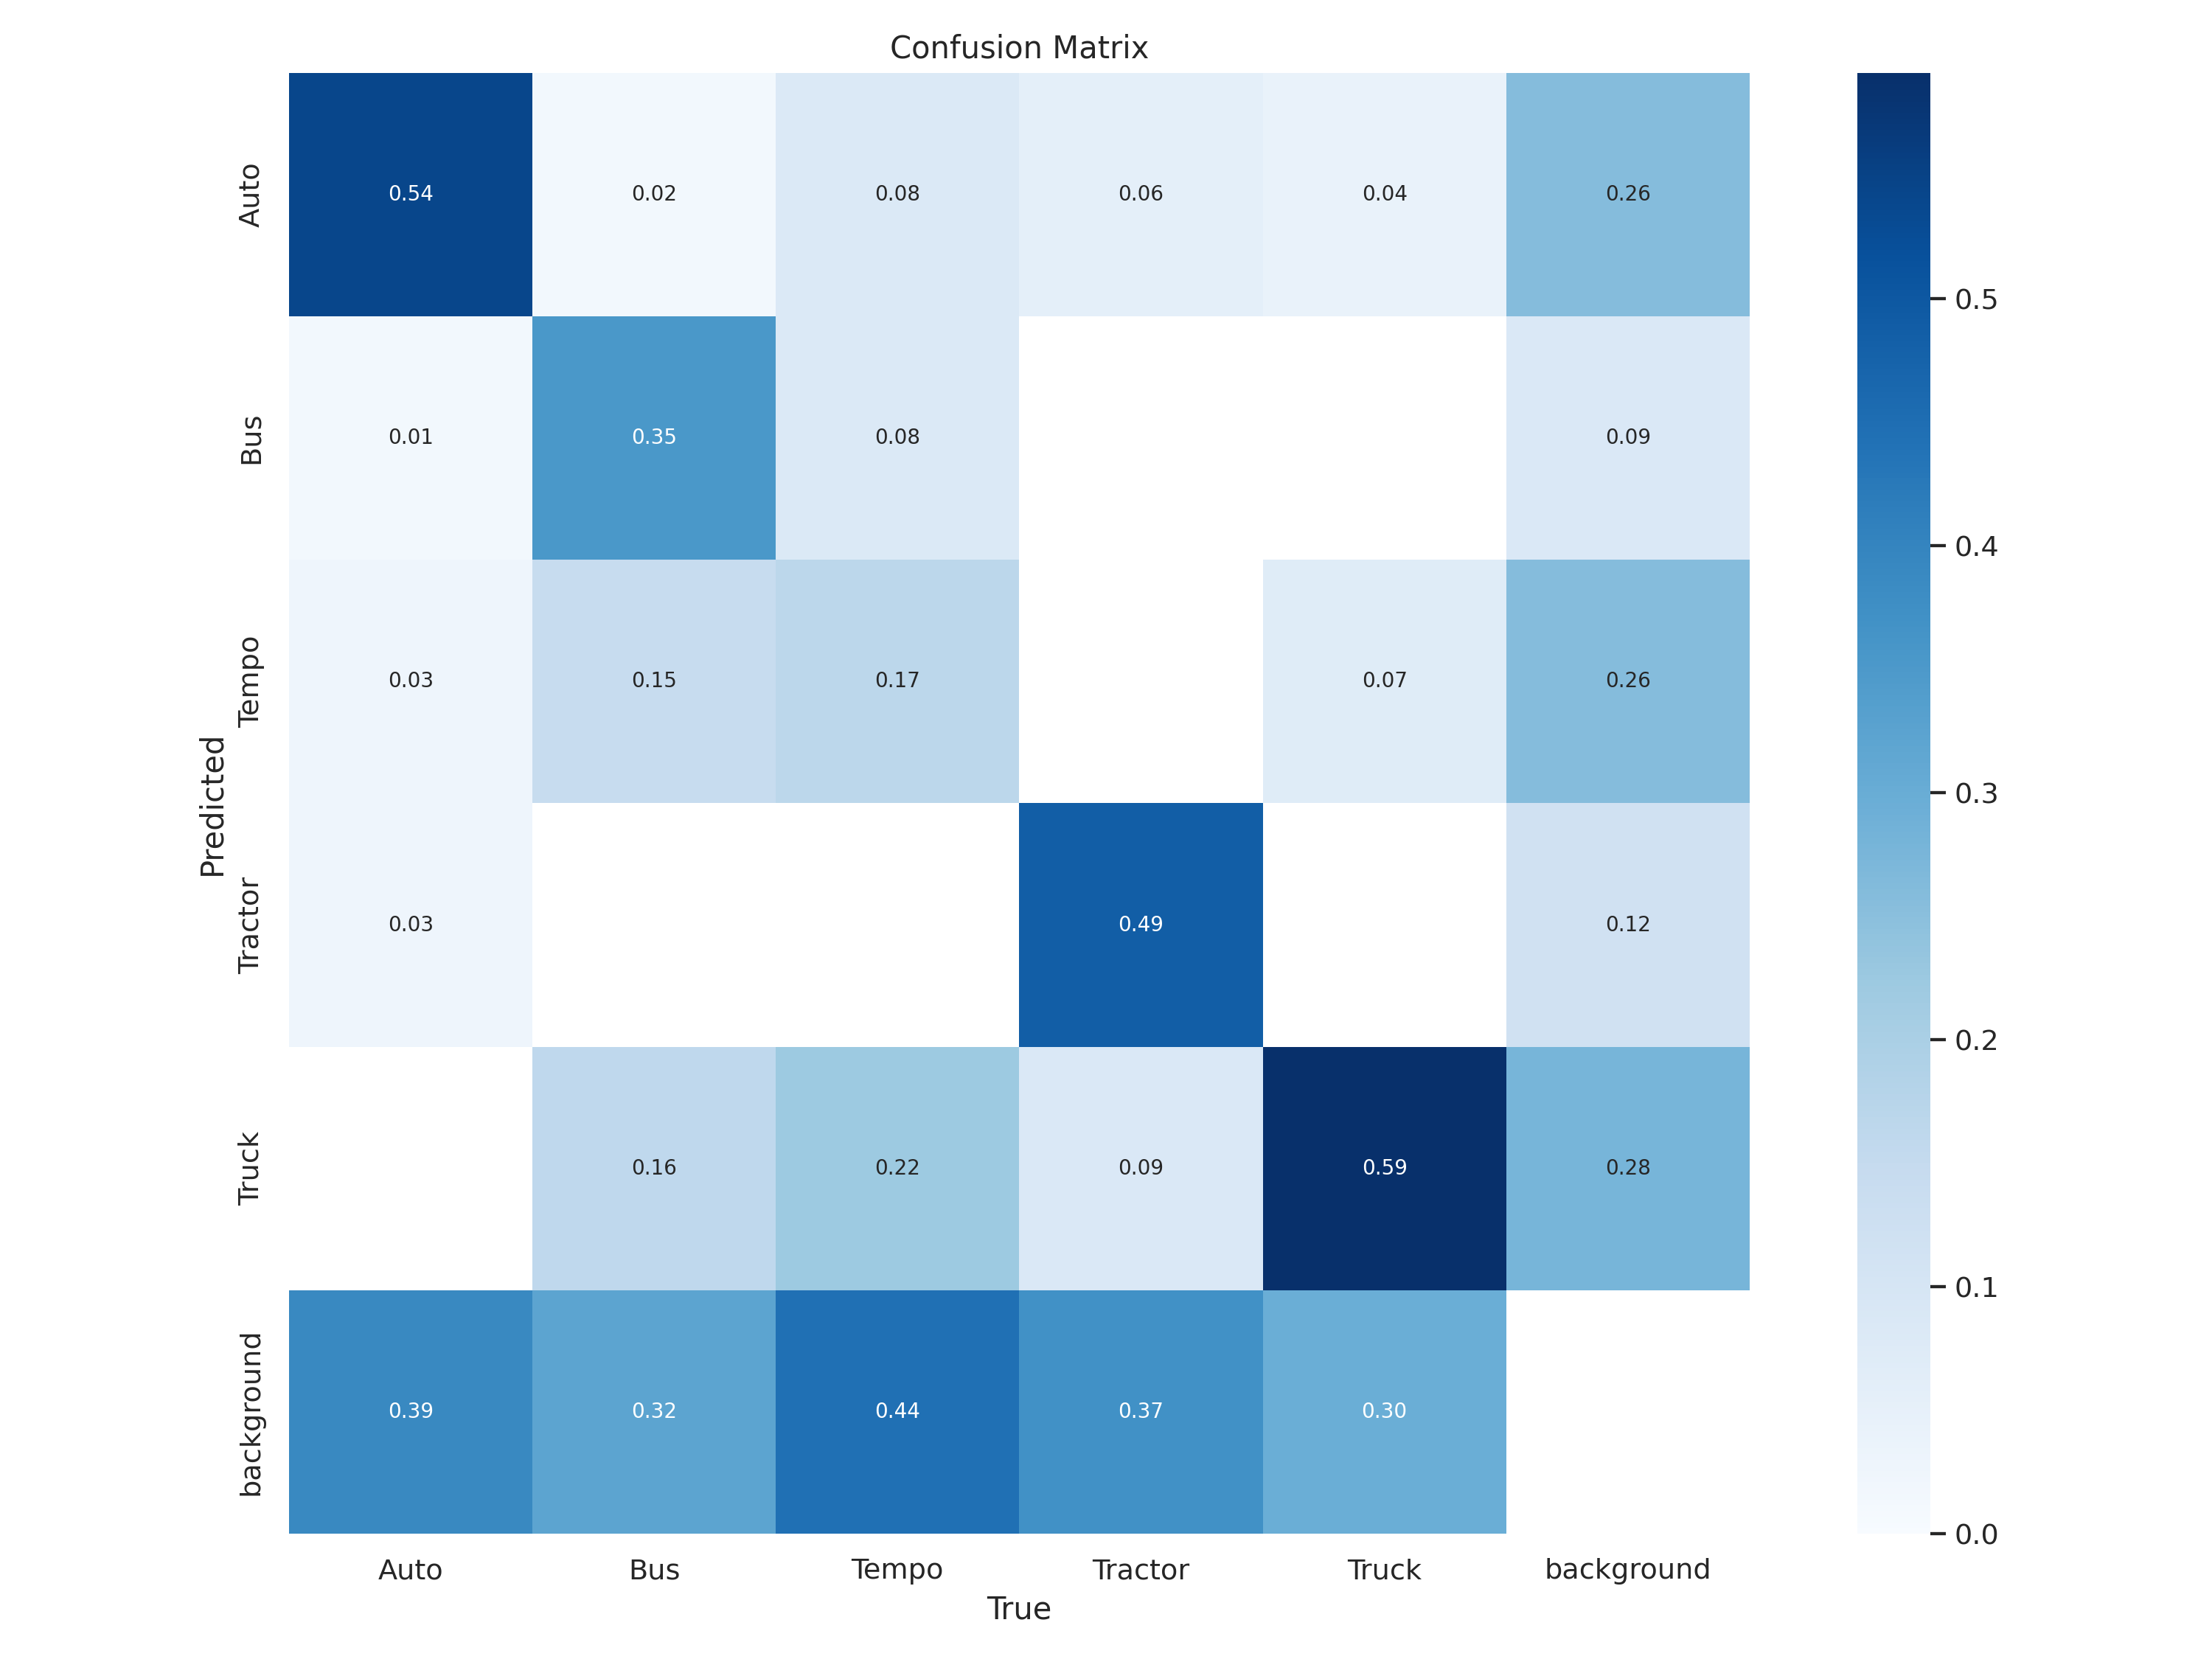

In [48]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


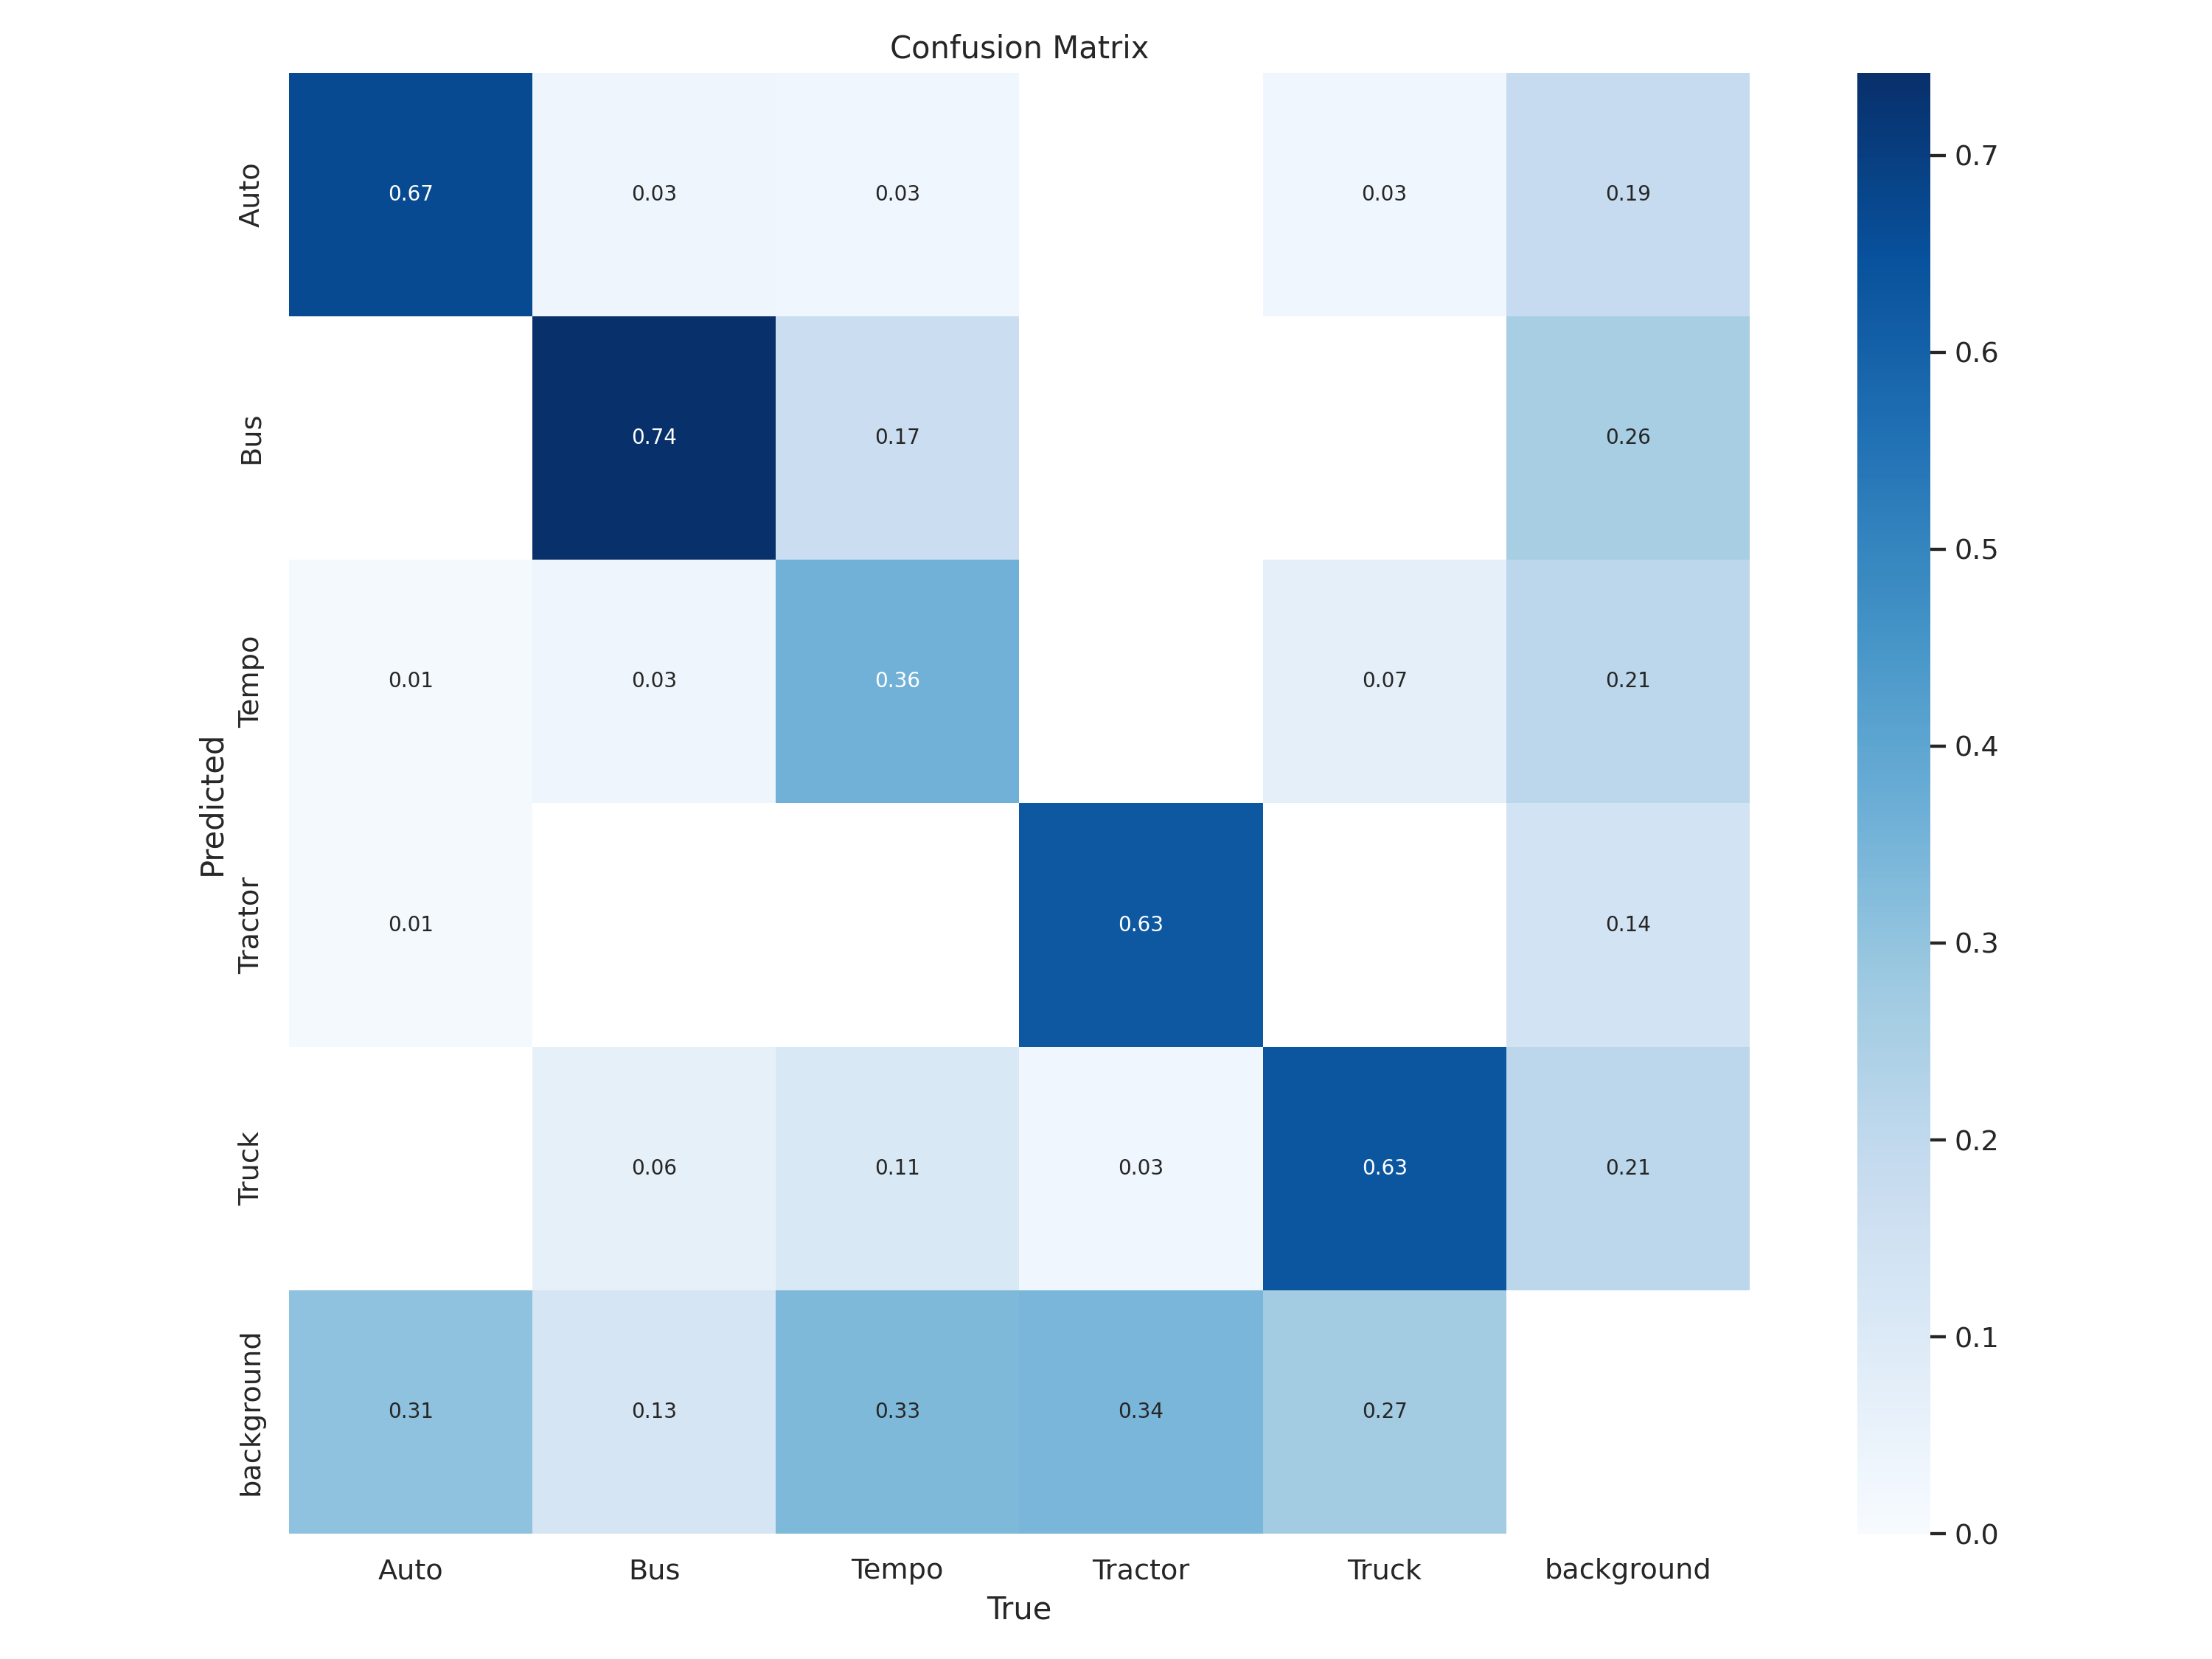

In [49]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


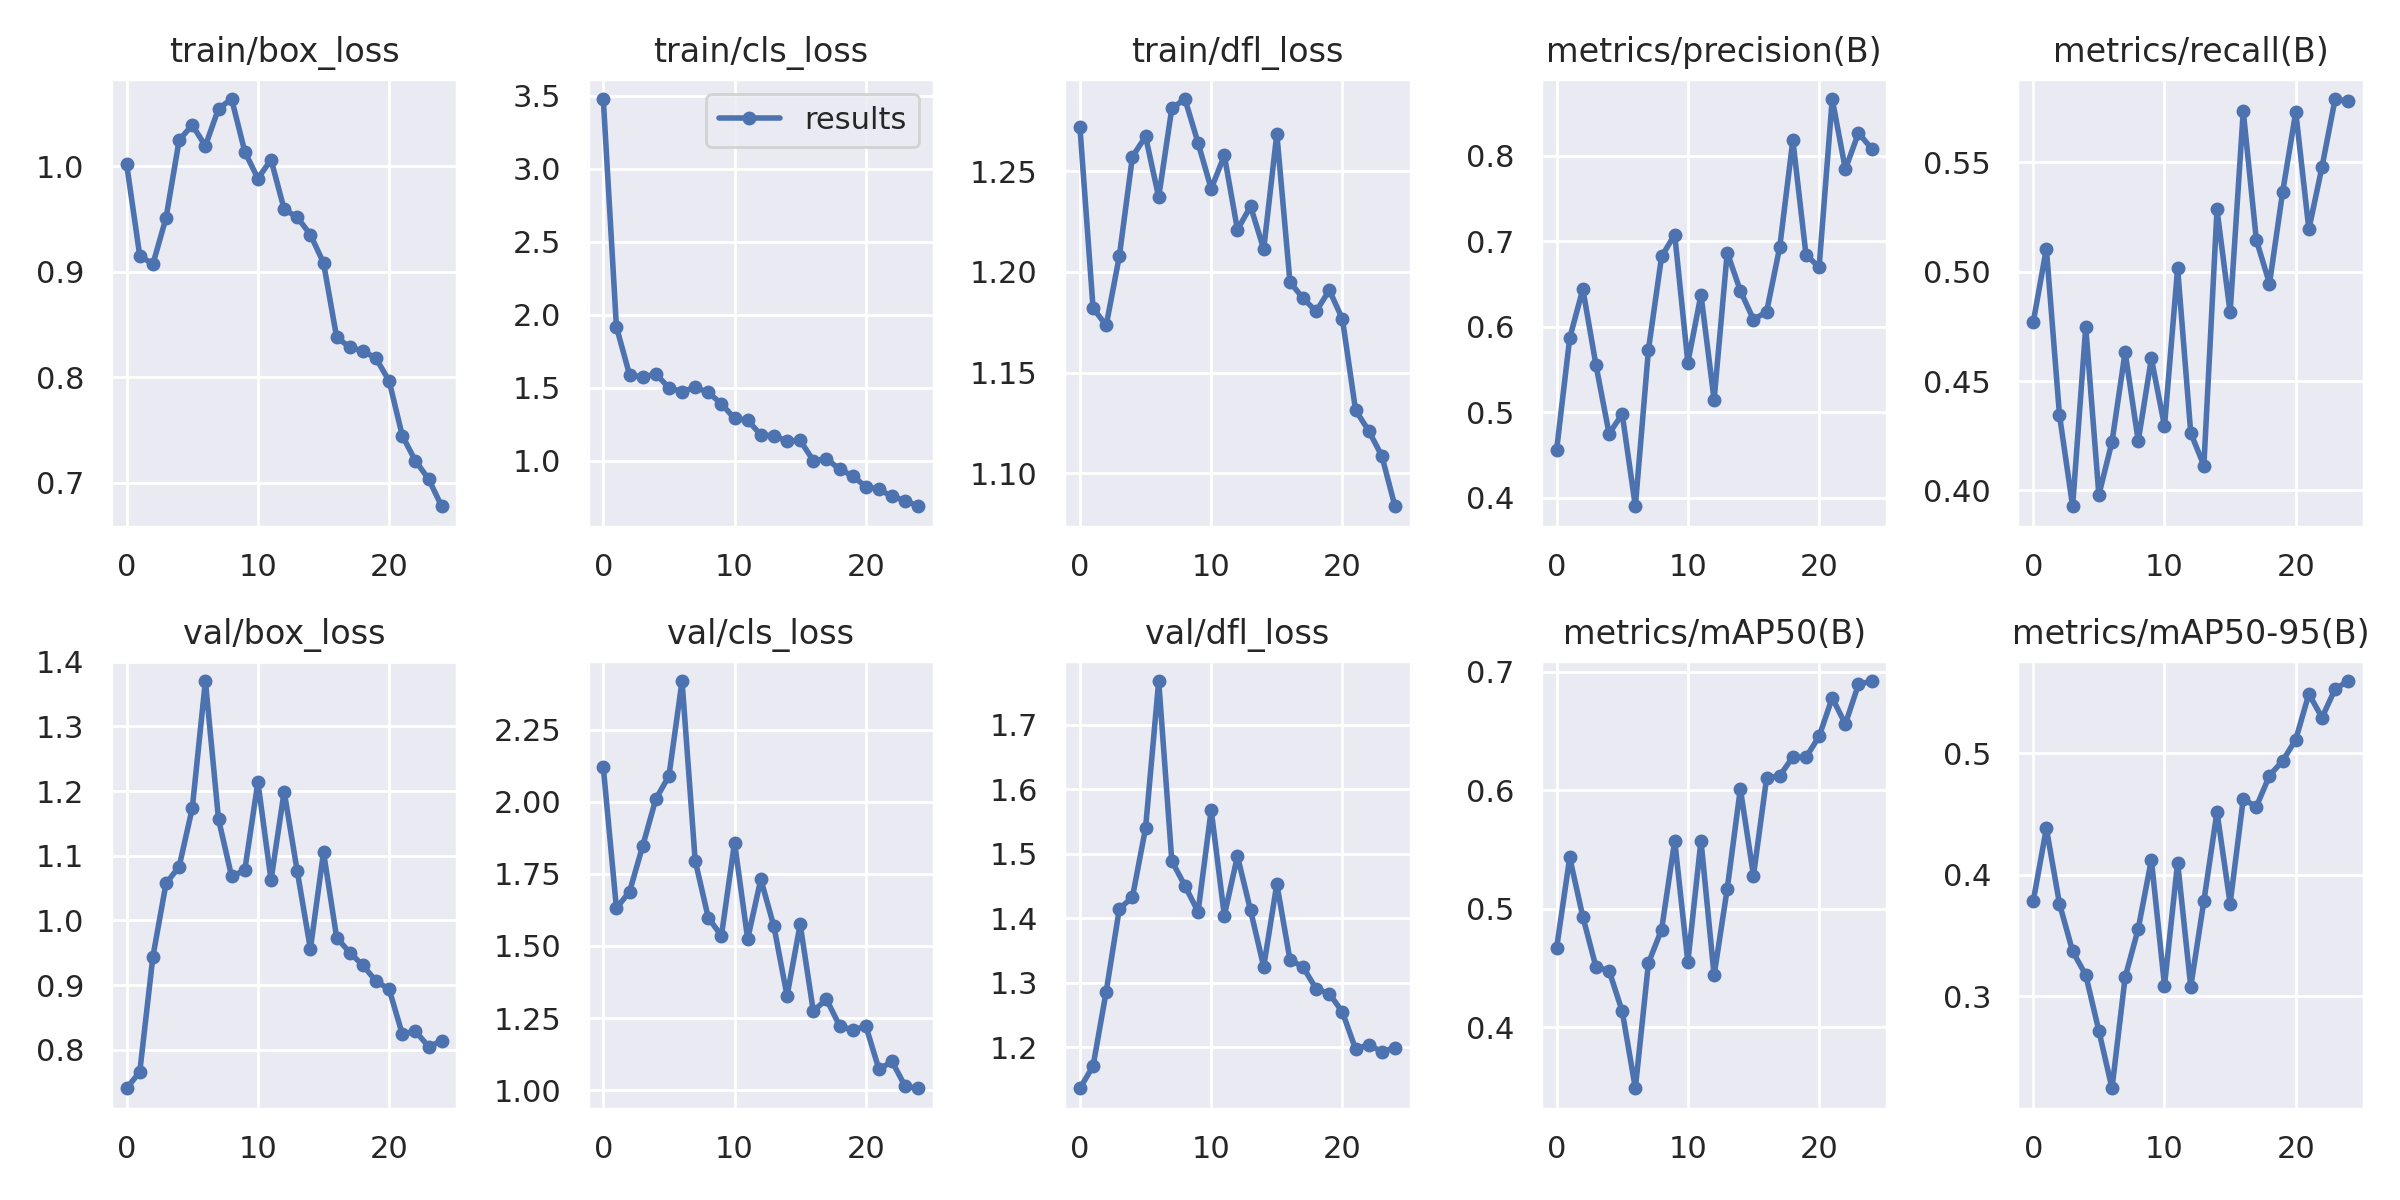

In [50]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


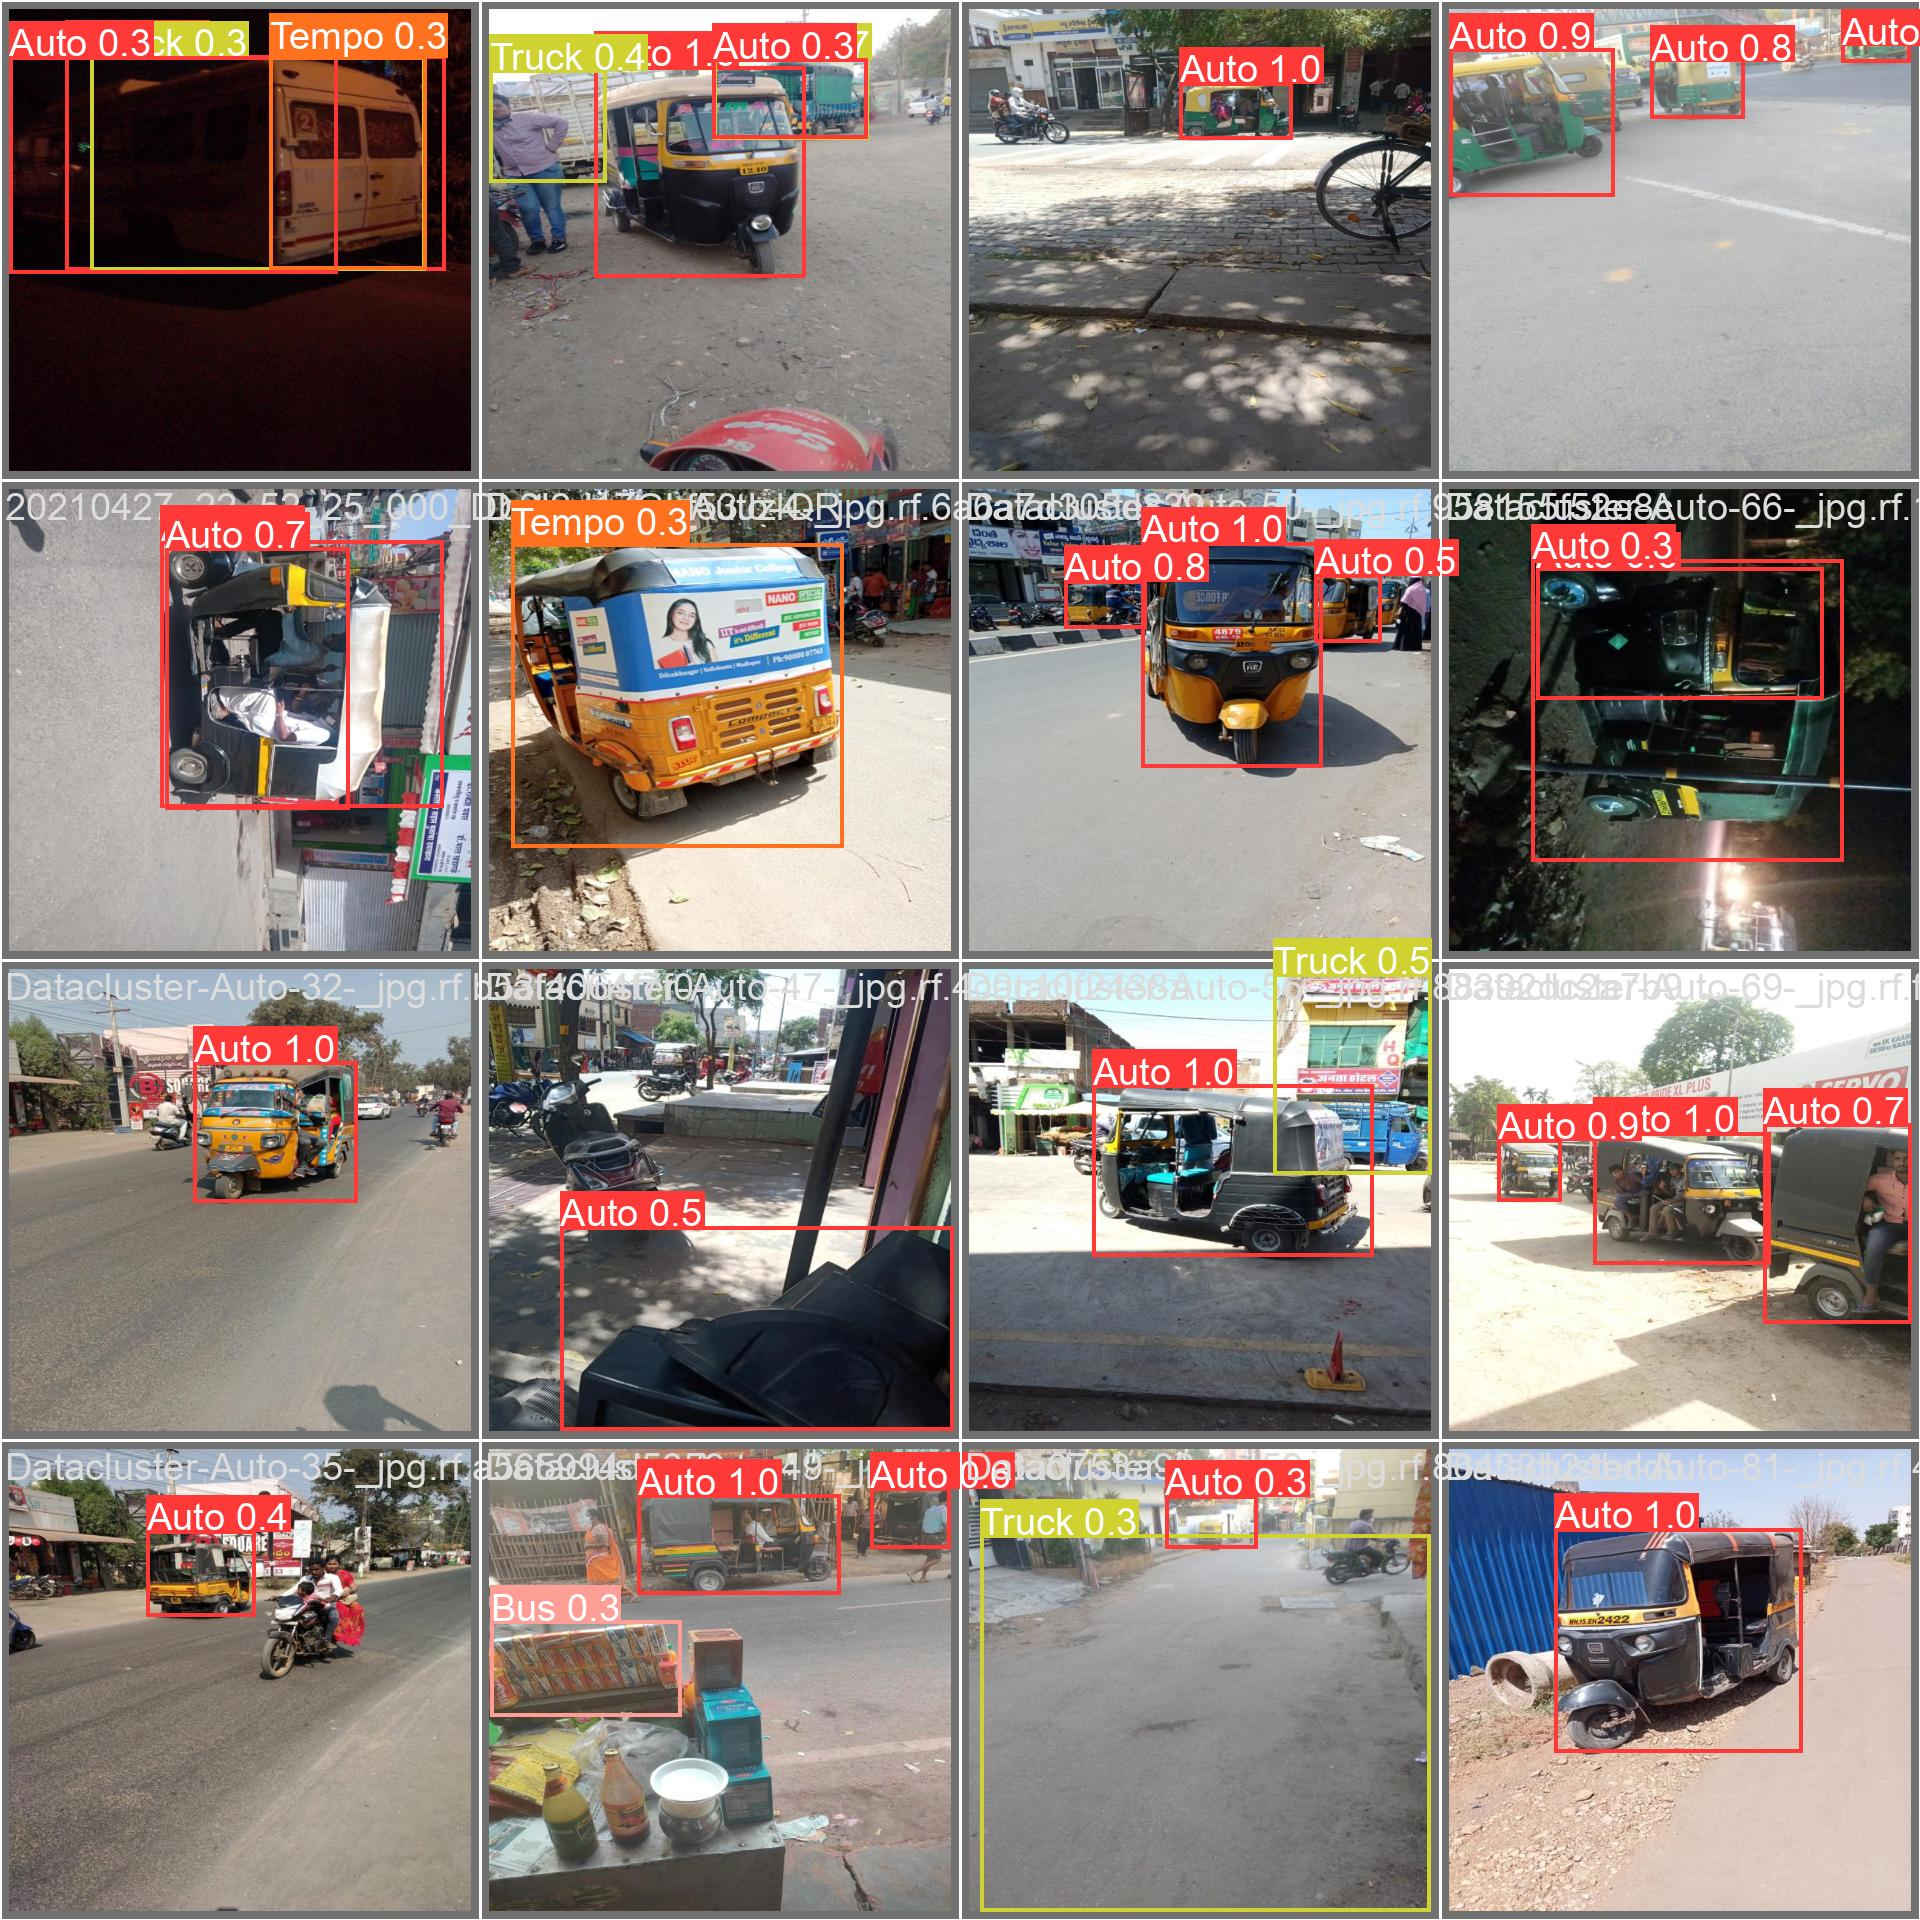

In [53]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


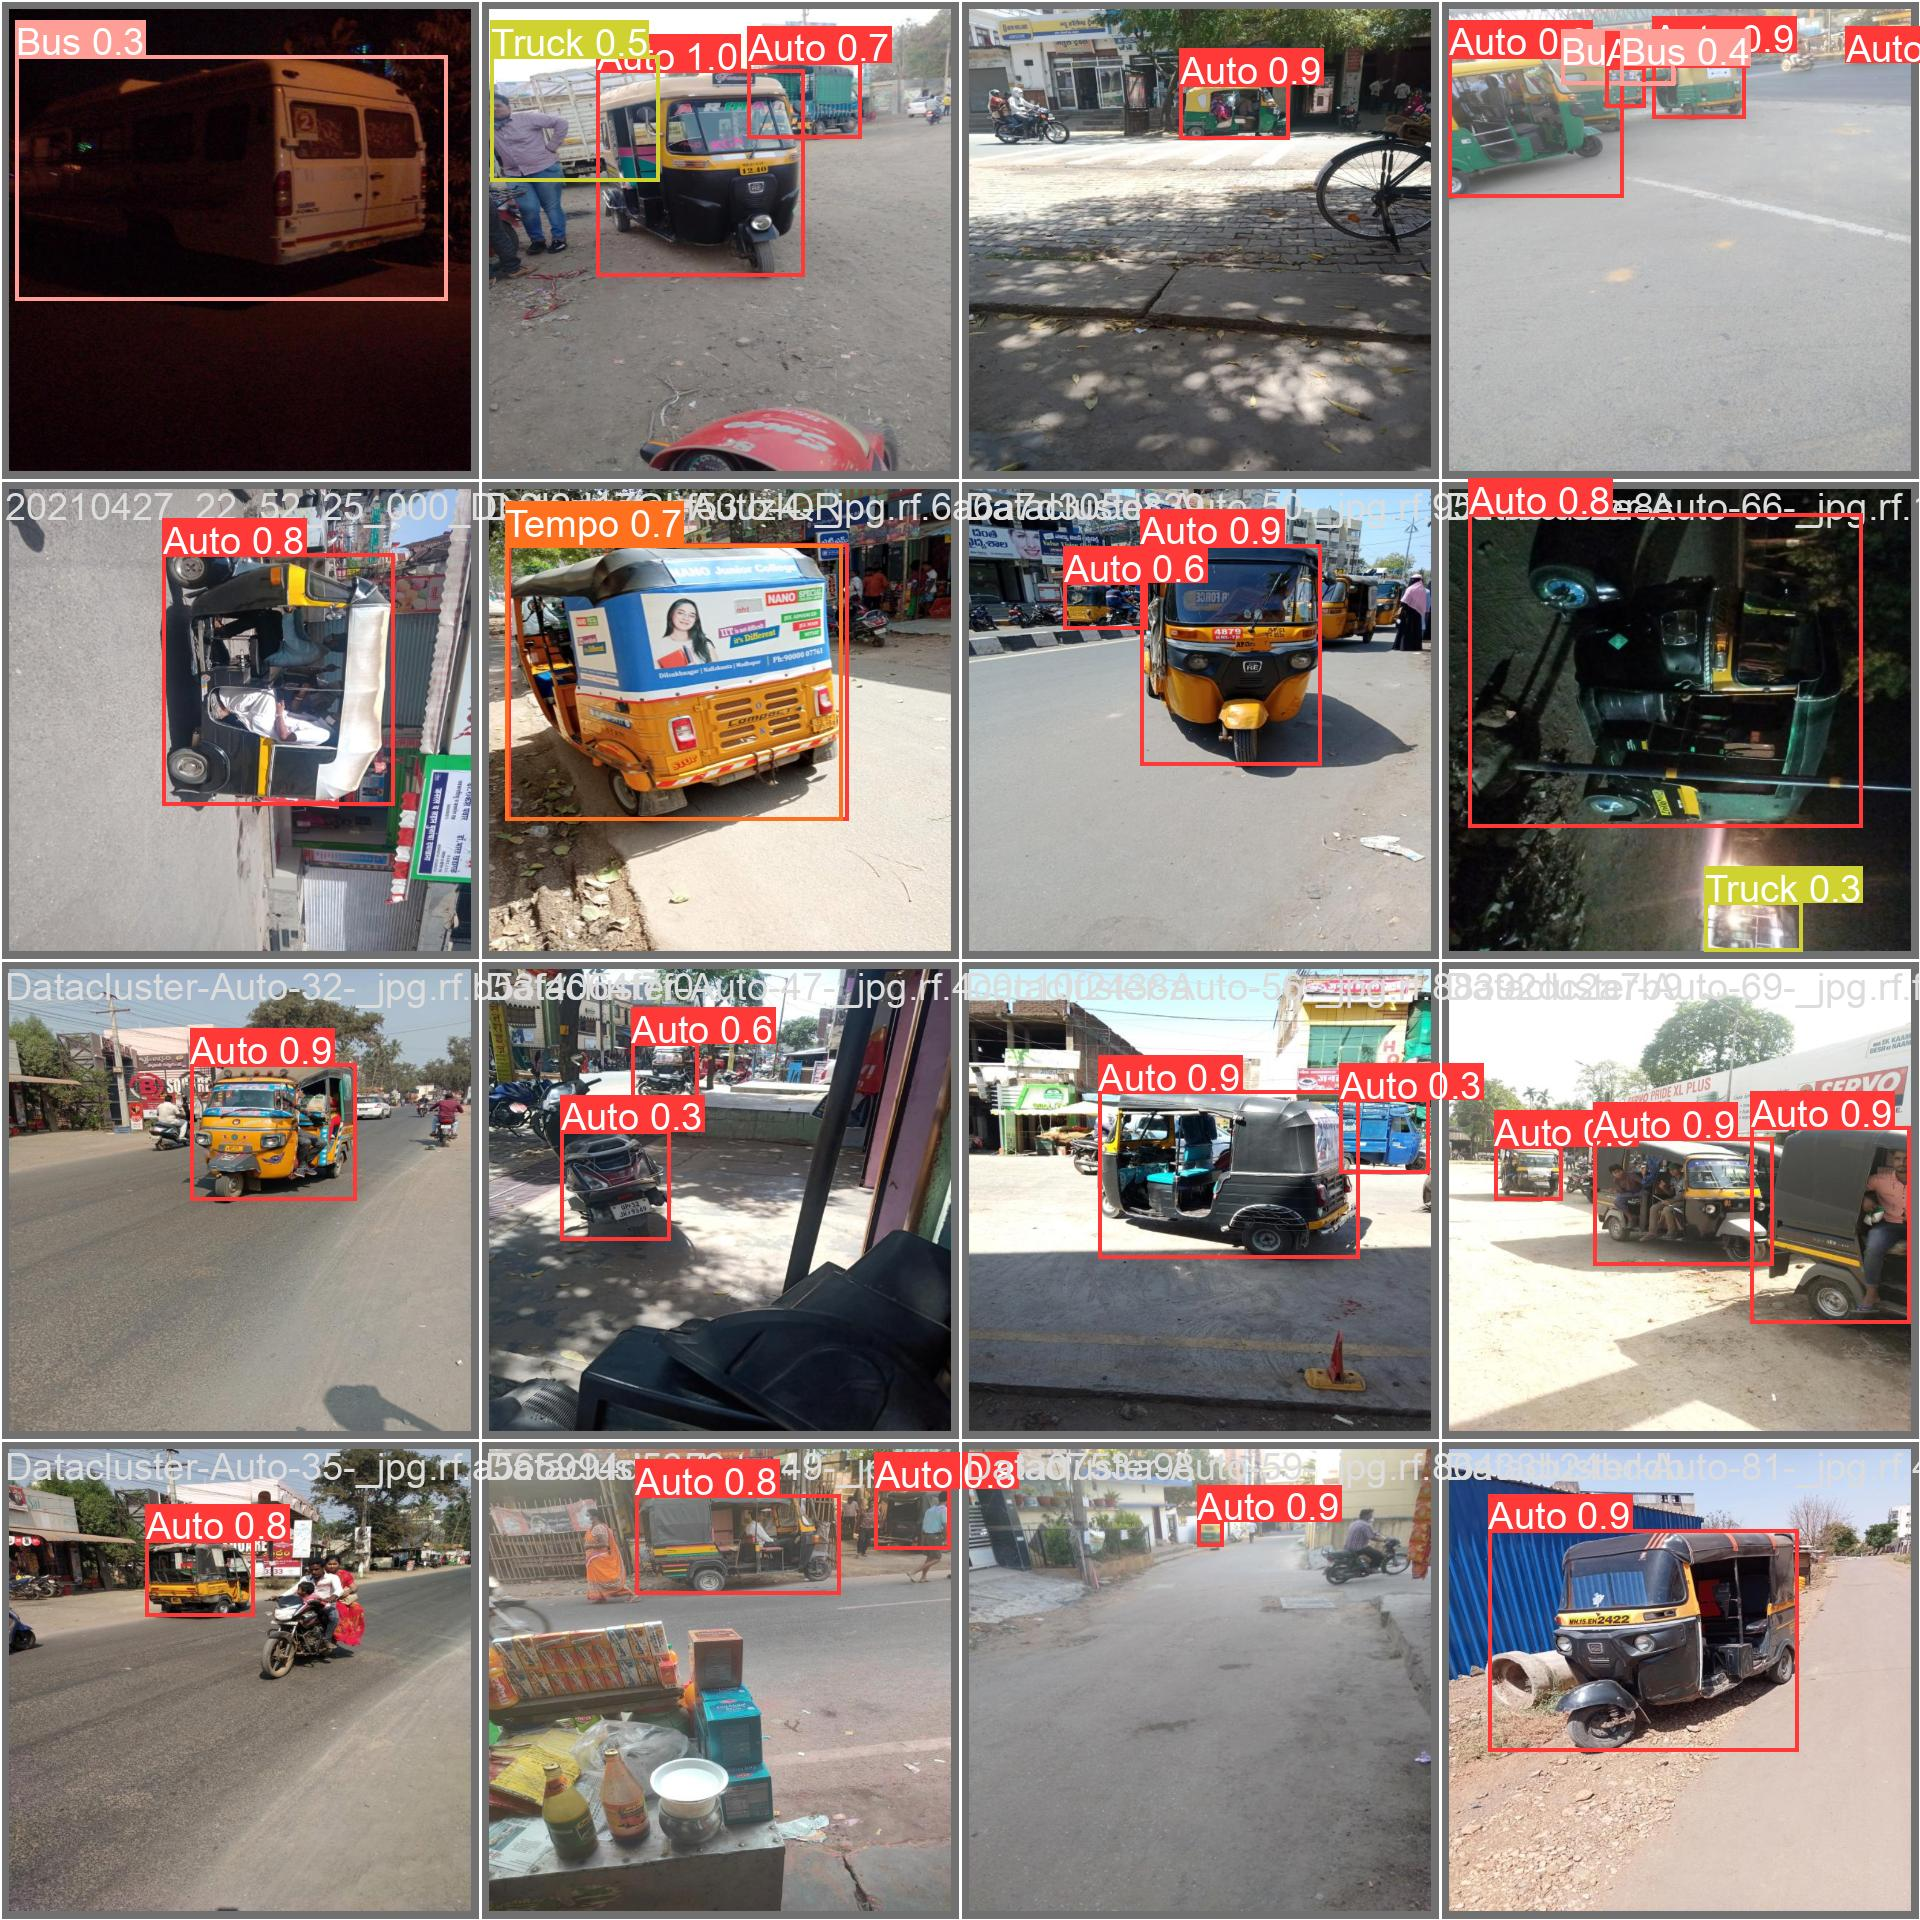

In [51]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Downloading the provided sample video

I have uploaded the video on google drive and using ```gdown``` for downloading the mp4 file

In [14]:
!gdown 1EHtOi7_NZ7RcIeF79LSj9Q5IsM_9lt3x

Downloading...
From: https://drive.google.com/uc?id=1EHtOi7_NZ7RcIeF79LSj9Q5IsM_9lt3x
To: /content/Vehicle_count_test.mp4
100% 108M/108M [00:01<00:00, 68.3MB/s]


## Install ByteTrack

[ByteTrack](https://github.com/ifzhang/ByteTrack) is great tracker but a bit poorly packaged. We need to jump through some fire hoops to make it work in tandem with [YOLOv8](https://github.com/ultralytics/ultralytics).

In [15]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [65]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    conf : float = 0.30
    track_thresh: float = 0.30
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [17]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.16.0


### Installing supervision dependencies

In [18]:
from supervision.draw.color import ColorPalette
from supervision import Point
from supervision import VideoInfo
from supervision import get_video_frames_generator
from supervision import VideoSink
from supervision import plot_image
from supervision import LineZone
from supervision import Detections, BoxAnnotator
# from supervision.tools.line_counter import LineCounter
from supervision import LineZone, LineZoneAnnotator

In [19]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

In [54]:
# settings
MODEL = "/content/runs/detect/train2/weights/best.pt"

In [55]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs


In [23]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of interest - car, motorcycle, bus and truck
CLASS_ID = [0, 1, 2, 3]

In [24]:
CLASS_NAMES_DICT

{0: 'Auto', 1: 'Bus', 2: 'Tempo', 3: 'Tractor', 4: 'Truck'}

In [26]:
from typing import List, Optional, Tuple

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [28]:
SOURCE_VIDEO_PATH = "/content/Vehicle_count_test.mp4"

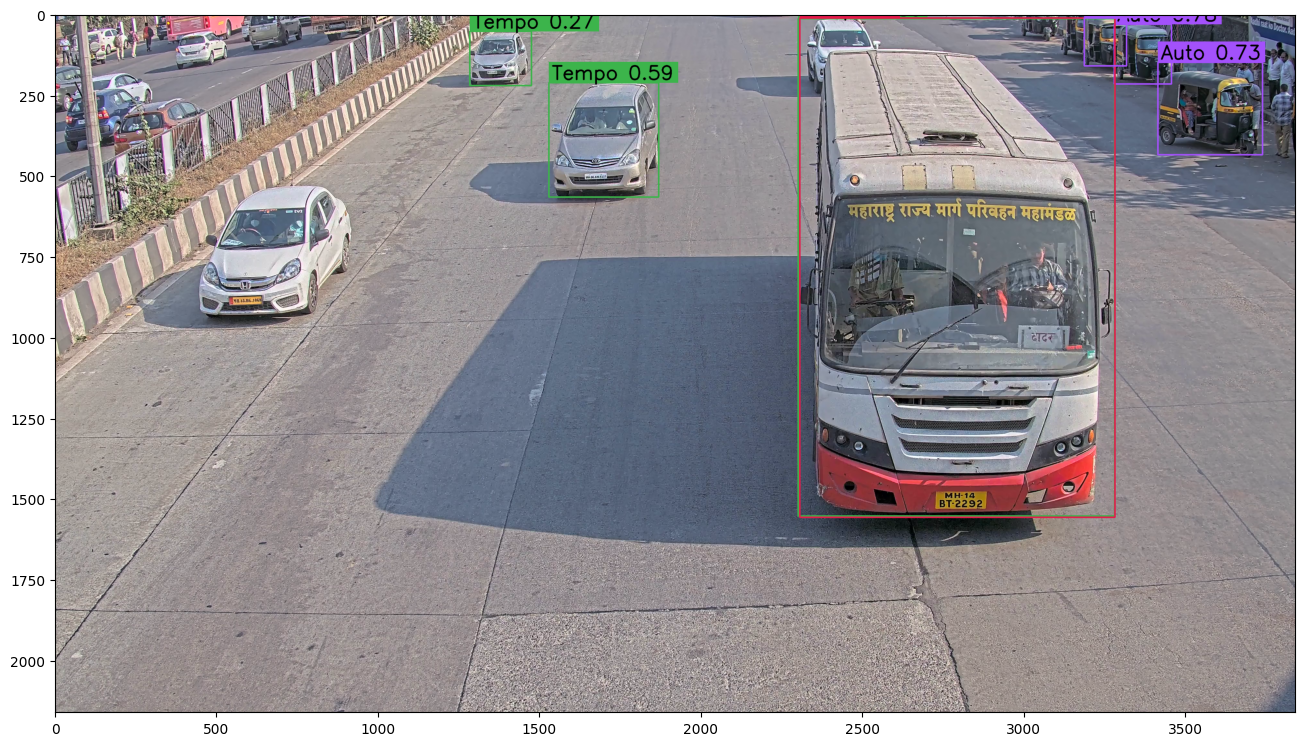

In [60]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette.default(), thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
# labels = [
#     f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
#     for _, confidence, class_id, tracker_id
#     in detections
# ]
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]

# annotate and display frame
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

%matplotlib inline
# plot_image(frame,(16, 16) )
plt.figure(figsize=(16, 16))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("on")
plt.show()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


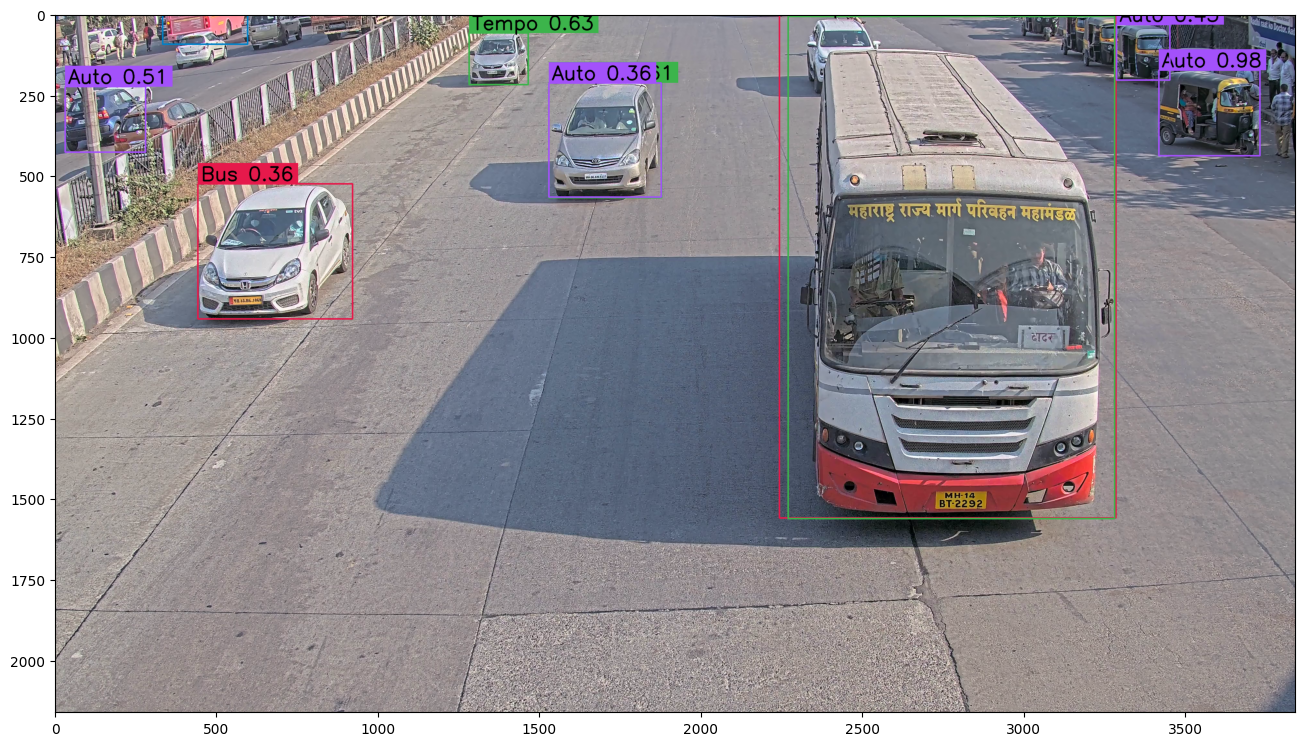

In [29]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette.default(), thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
# labels = [
#     f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
#     for _, confidence, class_id, tracker_id
#     in detections
# ]
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]

# annotate and display frame
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

%matplotlib inline
# plot_image(frame,(16, 16) )
plt.figure(figsize=(16, 16))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("on")
plt.show()

In [61]:
# settings
LINE_START = Point(50, 1000)
LINE_END = Point(3840-50, 1000)

TARGET_VIDEO_PATH = f"{HOME}/vehicle-counting-result-25.mp4"

In [62]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=3840, height=2160, fps=25, total_frames=855)

## Processing video for counting the vehicles

In [66]:
from tqdm.notebook import tqdm


# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
# line_counter = LineCounter(start=LINE_START, end=LINE_END)
line_zone = supervision.LineZone(start=LINE_START, end=LINE_END)

# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette.default(), thickness=4, text_thickness=4, text_scale=2)
# line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)
line_zone_annotator = supervision.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        # detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        # detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for confidence, class_id in zip(detections.confidence, detections.class_id)
        ]
        # updating line counter
        line_zone.trigger(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)
        line_zone_annotator.annotate(frame=frame, line_counter=line_zone)
        sink.write_frame(frame)

  0%|          | 0/855 [00:00<?, ?it/s]

## Downloading the video(second method is faster)

We can downlaod the video in two ways first is given below

In [72]:
from google.colab import files
files.download('/content/vehicle-counting-result-25.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Second method is to copy the video from "/contents" to google drive and then downloading it from drive  

In [73]:
!cp  /content/vehicle-counting-result-25.mp4 /content/drive/MyDrive/colab_data